**SENTIMENTAL ANALYSIS**

Sentiment Analysis has been a very popular task since the dawn of Natural Language Processing (NLP). It belongs to a subtask or application of text classification, where sentiments or subjective information from different texts are extracted and identified. Today, many businesses around the world use sentiment analysis to understand more deeply their customers and clients by analyzing sentiments across different target groups. It also has wide applications in different sources of information, including product reviews, online social media, survey feedback, etc.

**DATASET**

This is a list of over 34,000 consumer reviews for Amazon products like the Kindle, Fire TV Stick, and more provided by Datafiniti's Product Database. The dataset includes basic product information, rating, review text, and more for each product.

 **DATASET LINK** : [kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products) 

**IMPORTING PACKAGES AND LOADING DATA**

In [ ]:

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB


In [ ]:
# load dataset 
df = pd.read_csv('/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv')
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

<a id='eda'></a>
# Exploratory Data Analysis (EDA)


In [ ]:
data = df[["reviews.text","reviews.rating"]]
data.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34659 non-null  object 
 1   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [ ]:
# drop missing values
data.dropna(inplace=True)
data.isnull().sum()

reviews.text      0
reviews.rating    0
dtype: int64

In [ ]:
# explore some of the reviews
import random

n_samples = 5

for _ in range(n_samples):
    i = random.choice(range(data.shape[0]))
    print(f"REVIEW TEXT:\n{data['reviews.text'][i]} \n\nRATE:\n{data['reviews.rating'][i]}")
    print('\n', 90*"-", '\n')

REVIEW TEXT:
I bought this tablet for my wife. The Google app store and 8 gigs of memory were just what she was looking for. 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
The Amazon Echo provides both a way to coordinate household appliances but also answers to b all your questions. Easy to use, maximum effectiveness. I discover new uses for my Echo every day. Coordinates tasks with my cellphone and allows for programming contingencies (if this, then that). I love it. 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
For the amount of money it is actually a good tablet. 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
If you are in doubt about spending the extra money to buy the Voyage... don't be. If it hadn't been a gift I would have most like not spent the money but after

In [ ]:
# descriptive statistics
data.describe()

,reviews.rating
count,34626.000000
mean,4.584561
std,0.735660
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    23774
4.0     8541
3.0     1499
2.0      402
1.0      410
Name: reviews.rating, dtype: int64

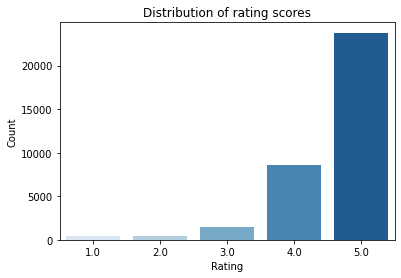

In [ ]:
# distribution of rating
sns.countplot(data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

There is a huge imbalance in the data to the high rate classes<br>
> Handling this by adding more data to the low rate classes.

In [ ]:
# load the other data
data2 = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data2 = data2[['reviews.text', 'reviews.rating']]
# use only data of rating lower than or equal to 3
data2 = data2[data2["reviews.rating"] <= 3].reset_index(drop=True) # reset index after filtering rows

data3 = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
data3 = data3[['reviews.text', 'reviews.rating']]
# use only data of rating lower than or equal to 3
data3 = data3[data3["reviews.rating"] <= 3].reset_index(drop=True) # reset index after filtering rows

In [ ]:
# distribution of rating
data2['reviews.rating'].value_counts().sort_index(ascending=False)

3    1206
2     616
1     965
Name: reviews.rating, dtype: int64

In [ ]:
# distribution of rating
data3['reviews.rating'].value_counts().sort_index(ascending=False)

3    197
2     54
1     63
Name: reviews.rating, dtype: int64

In [ ]:
# concatenation
data = pd.concat([data, data2, data3])

# assert data.shape[0] == data.shape[0] + data2.shape[0] + data3.shape[0]
data.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [ ]:
# distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    23774
4.0     8541
3.0     2902
2.0     1072
1.0     1438
Name: reviews.rating, dtype: int64

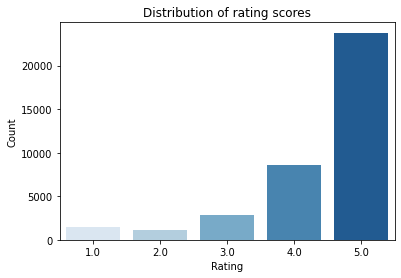

In [ ]:
# distribution of rating
sns.countplot(data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
0,This product so far has not disappointed. My c...,5.0,1,POSITIVE
1,great for beginner or experienced person. Boug...,5.0,1,POSITIVE
2,Inexpensive tablet for him to use and learn on...,5.0,1,POSITIVE
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1,POSITIVE
4,I bought this for my grand daughter when she c...,5.0,1,POSITIVE


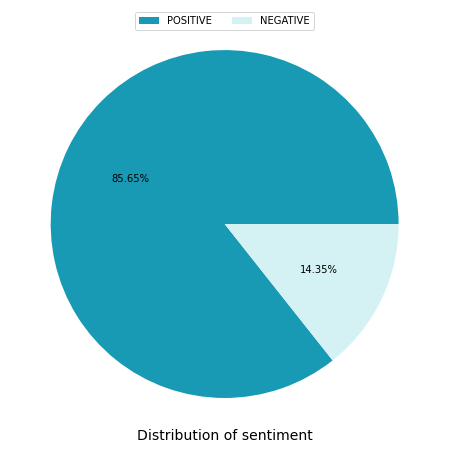

In [ ]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

###Visualizing Most used words

#### All Reviews

In [ ]:
# get all used words 
all_words = pd.Series(' '.join(data['reviews.text']).split())

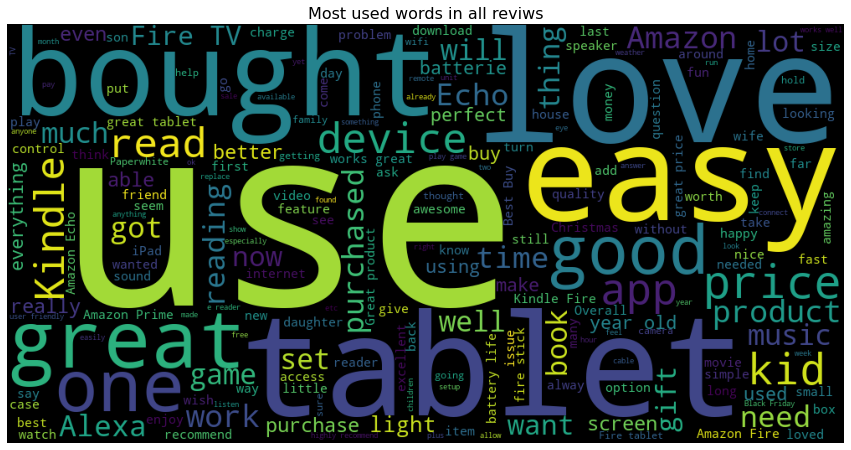

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

#### Positive Reviews

In [ ]:
# get words used positive reivews 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['reviews.text']).split())

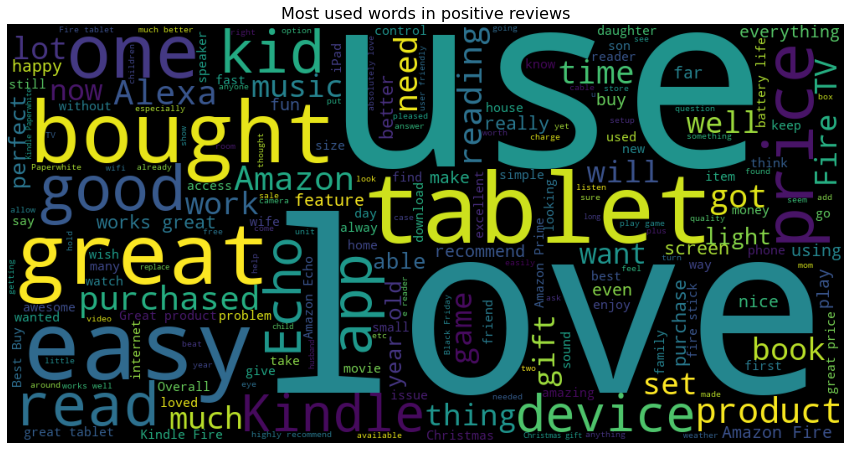

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

#### Negative Reviews

In [ ]:
# get words used negative reivews 
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['reviews.text']).split())

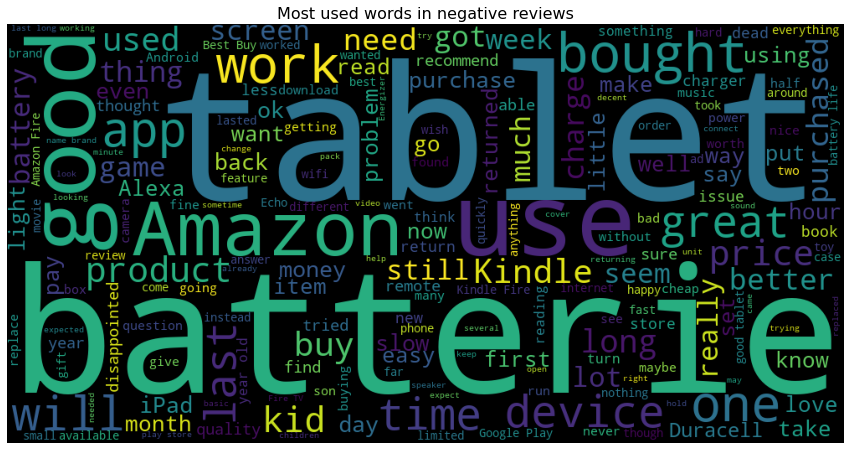

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

<a id='pro'></a>
## Text Processing

<a id='clean'></a>
### 1. Clean Text


In [ ]:
def clean_text(text:str):
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    text = str(text)
    
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()
    
    return text

In [ ]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
clean_text(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'this is a message to be cleaned it may involve some things like adjacent spaces and tabs'

<a id='stop'></a>
### 2. Remove Stopwords
There can be some words in our sentences that occur very frequently and don't contribute too much to the overall meaning of the sentences. We usually have a list of these words and remove them from each our sentences. For example: "a", "an", "the", "this", "that", "is", "it", "to", "and" in this example.

In [ ]:
def remove_stopwords(text:str):
    """ Remove stopwords from text:
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    text = str(text)
    filtered_sentence = []

    # Stop word lists can be adjusted for your problem
    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    
    return text

In [ ]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
remove_stopwords(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'message be cleaned may involve some things like adjacent spaces tabs'

<a id='stem'></a>
### 3. Stemming
Stemming is a rule-based system to convert words into their root form. It removes suffixes from words. This helps us enhace similarities (if any) between sentences. 

Example:
> "jumping", "jumped" -> "jump"
>
> "cars" -> "car"

In [ ]:
def stemm_text(text:str):
    """ Stemm text:
    ------
    input: text (str)    
    output: Stemmed text (str)
    """
    text = str(text)
    # Initialize the stemmer
    snow = SnowballStemmer('english')

    stemmed_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        # Stem the word/token
        stemmed_sentence.append(snow.stem(w))
    text = " ".join(stemmed_sentence)
    
    return text

In [ ]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)
stemm_text(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'messag be clean may involv some thing like adjac space tab'

> You can see above that stemming operation is NOT perfect. We have mistakes such as "messag", "involv", "adjac". 

<a id='lemm'></a>
### 4. Lemmatization
If we are not satisfied with the result of stemming, we can use the Lemmatization instead. It usually requires more work, but gives better results. As mentioned in the class, lemmatization needs to know the correct word position tags such as "noun", "verb", "adjective", etc. and we will use another NLTK function to feed this information to the lemmatizer.

In [ ]:

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def lemmatize(text:str):
    """ lemmatize text:
    ------
    input: text (str)    
    output: lemmatized text (str)
    """
    text = str(text)
    
    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)
    
    return lemmatized_text

In [ ]:
# testing
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)
# text = stemm_text(text)
lemmatize(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'message be clean may involve some thing like adjacent space tabs'

### Final text processing functions 

In [ ]:
# clean text
data['text'] = data['reviews.text'].apply(clean_text)
# remove stopwords
data['text'] = data['text'].apply(remove_stopwords)
# lemmatize
data['text'] = data['text'].apply(lemmatize)

In [ ]:
# check some processed reviews
import random

i = random.choice(range(len(data)))

print(f"Original review: \n{data['reviews.text'].iloc[i]}\n")
print(f"Processed review: \n{data['text'].iloc[i]}")      

Original review: 
It was a great purchase and I love the way it works

Processed review: 
be great purchase i love way work


In [ ]:
# export cleaned data to csv
data.to_csv('cleaned_data.csv', index=False)

In [ ]:
data = pd.read_csv('cleaned_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37727 entries, 0 to 37726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     37727 non-null  object 
 1   reviews.rating   37727 non-null  float64
 2   sentiment_score  37727 non-null  int64  
 3   sentiment        37727 non-null  object 
 4   text             37726 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37726 entries, 0 to 37726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     37726 non-null  object 
 1   reviews.rating   37726 non-null  float64
 2   sentiment_score  37726 non-null  int64  
 3   sentiment        37726 non-null  object 
 4   text             37726 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ MB




# Feature Engineering 

### TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(data['text'])
features = vectorizer.transform(data['text'])

features.toarray()

array([[0.        , 0.31997416, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
# tf_idf.drop('50', axis=1, inplace=True)
tf_idf.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,would,wouldn,wrong,year,yet,you,young,your,youtube,yr
0,0.0,0.319974,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.114228,0.0,0.0,0.129196,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.075228,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.117444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.068385,0.0,0.0,0.0,0.0


### Splitting Dataset into Train and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf, data['sentiment_score'], test_size=0.2, random_state=42)

print (f'Train set shape\t:{X_train.shape}\nTest set shape\t:{X_test.shape}')

Train set shape	:(30180, 700)
Test set shape	:(7546, 700)


In [ ]:
yy = pd.DataFrame(y_train)
train_data = pd.concat([X_train, yy],axis=1)
train_data.head()


,50,ability,able,about,absolutely,access,account,actually,ad,add,...,wouldn,wrong,year,yet,you,young,your,youtube,yr,sentiment_score
0,0.0,0.319974,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000000,0.114228,0.0,0.0,0.129196,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.075228,0.0,0.0,0.0,0.0,1.0
5,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.16796,0.0,0.000000,0.0,0.0,0.0,0.0,1.0


### Oversampling

In [ ]:
train_data['sentiment_score'].value_counts()

1.0    25902
0.0     4278
Name: sentiment_score, dtype: int64

In [ ]:
target_count = train_data['sentiment_score'].value_counts()
negative_class = train_data[train_data['sentiment_score'] == 0]
positive_class = train_data[train_data['sentiment_score'] == 1]

negative_over = negative_class.sample(target_count[1], replace=True)

df_train_over = pd.concat([positive_class, negative_over], axis=0)
df_train_over = shuffle(df_train_over)
df_train_over.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,wouldn,wrong,year,yet,you,young,your,youtube,yr,sentiment_score
22663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.408913,0.0,0.0,0.0,0.0,0.0,1.0
36423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
35355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
36614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
35554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train_over.dropna(inplace=True)

In [ ]:
df_train_over['sentiment_score'].value_counts()

1.0    22189
0.0    21429
Name: sentiment_score, dtype: int64

In [ ]:
X_train = df_train_over.iloc[:,:-1]
y_train = df_train_over['sentiment_score']

<a id='ml'></a>
#Building Machine Learning Models

In [ ]:
def modeling(Model, Xtrain = X_train, Xtest = X_test):
   
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
    #cm = confusion_matrix(y_test, y_pred)
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['Actual'], colnames=['Predictions']).astype(int)
    plt.figure(figsize = (8,8))

    
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix') 

# **NAIVE BAYES**

              precision    recall  f1-score   support

           0       0.45      0.77      0.57      1134
           1       0.95      0.83      0.89      6412

    accuracy                           0.82      7546
   macro avg       0.70      0.80      0.73      7546
weighted avg       0.88      0.82      0.84      7546

AUC  0.801456374236578


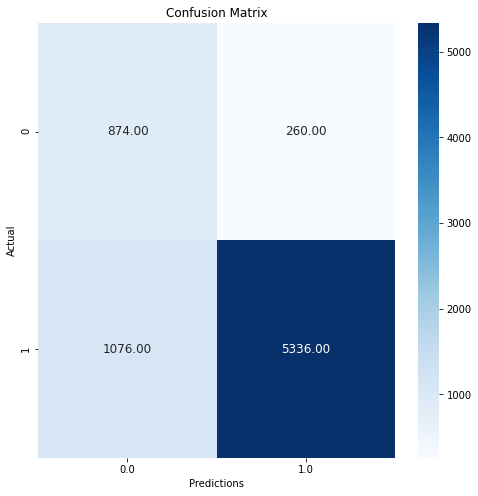

In [ ]:
modeling(MultinomialNB())

# **SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC()

In [ ]:
model.fit(X_train_new,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [ ]:
model.predict(X_test_new)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
model.score(X_test_new, y_test)

0.9536679536679536

# **PICKLE FILE FOR DEPLOYMENT**

In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))